In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata
from sklearn.linear_model import LinearRegression
from upsetplot import from_indicators, from_contents
from upsetplot import plot as upset
import matplotlib
import muon

fsize=15

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
  lims = [
      np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
      np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
  ]

  # now plot both limits against eachother
  ax.plot(lims, lims, 'white', alpha=0.75, zorder=0)
  ax.set(**{
      "aspect": "equal",
      "xlim": lims,
      "ylim": lims
  })
  return ax

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [40]:
blue = "#34CBBF"
red = "#CB3440"

In [41]:
ss = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/shareseqv2/hgmm/mu.h5mu")
sa = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/issaacseq/hgmm/mu.h5mu")

genes_hg = sa.var[sa.var.index.str.contains("ENSG")].index
genes_mm = sa.var[sa.var.index.str.contains("ENSMUS")].index

In [42]:
ss_hg = ss.var["counts_sum"][genes_hg]
ss_mm = ss.var["counts_sum"][genes_mm]

sa_hg = sa.var["counts_sum"][genes_hg]
sa_mm = sa.var["counts_sum"][genes_mm]

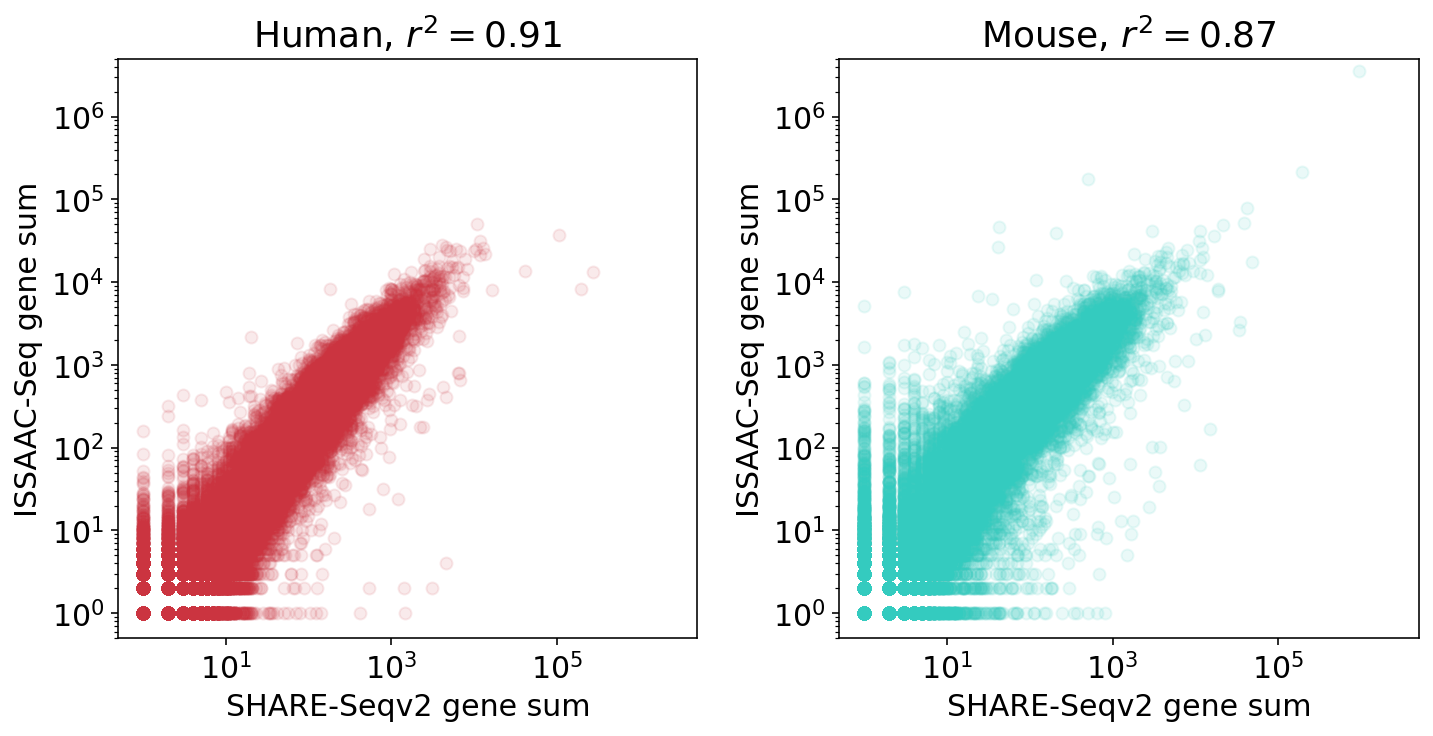

In [44]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, constrained_layout=True)

ax = axs[0]
x = ss_hg.values
y = sa_hg.values

ax.scatter(x,y, color=red, alpha=0.1)

lx, ly = np.log1p(x).reshape(-1,1), np.log1p(y)
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.set(**{
    "xlabel": "SHARE-Seqv2 gene sum",
    "ylabel": "ISSAAC-Seq gene sum",
    "xscale": "log",
    "yscale": "log",
    "title": f"Human, $r^2={r2:,.2f}$",
    "xlim": (0.5, 5e6),
    "ylim": (0.5, 5e6),
})
yex(ax)

ax = axs[1]
x = ss_mm.values
y = sa_mm.values

ax.scatter(x,y, color=blue, alpha=0.1)
lx, ly = np.log1p(x).reshape(-1,1), np.log1p(y)
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.set(**{
    "xlabel": "SHARE-Seqv2 gene sum",
    "ylabel": "ISSAAC-Seq gene sum",
    "xscale": "log",
    "yscale": "log",
    "title": f"Mouse, $r^2={r2:,.2f}$",
    "xlim": (0.5, 5e6),
    "ylim": (0.5, 5e6),
})
yex(ax)
fig.savefig("figures/cmp_shareseq_issaacseq_gene.png", bbox_inches="tight", dpi=300)
fig.show()